#**Espectro del Sol**

In [ ]:
import numpy as np
from scipy import interpolate
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import splev, splrep
import matplotlib.pyplot as plt

In [ ]:
def fts_spectra(wli, wlf):

    """'Kitt Peak FTS-Spectral-Atlas'"""

    print('Enter end wavelength (3290 - 12508 A)')
    #path = '/Users/dorozco/Dropbox (IdAdA)/Python/'
    file = 'fts.npz'
    # np.savez('fts.npz', fts=fts, fts_w=fts_w)
    data = np.load(file)
    fts = data['fts']
    fts_w = data['fts_w']

    indx = np.where((fts_w > np.int(wli)) & (fts_w < np.int(wlf)))

    return fts[indx], fts_w[indx]

Enter end wavelength (3290 - 12508 A)
Los puntos que se encuentran entre 3800 - 3810 Ángstrom son:
EJE Y: 
 [4770 4716 4661 ... 8941 8911 8884] 
 num_puntos: 4999
EJE X: 
 [3800.002  3800.004  3800.006  ... 3809.9941 3809.996  3809.998 ] 
 num_puntos: 4999
(array([3800.00195312, 3800.00195312, 3800.00195312, ..., 3809.99804688,
       3809.99804688, 3809.99804688]), array([4770.        , 4726.21230884, 4684.76214709, ...,    0.        ,
          0.        ,    0.        ]), 3) 5003
[3800.  3802.5 3805.  3807.5 3810. ] 5
[4844.7301286  7226.         9057.         2319.         8866.07798363] 5


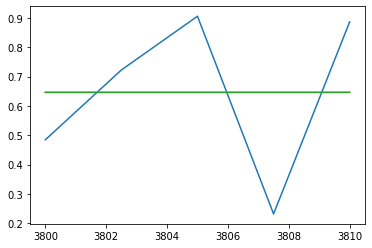

In [ ]:
# Para que sea con unidades multiplicar el FTS por la función de plank a 5000A.
onda_i = 3800 # 3800
onda_f = 3810 # 4600
num_puntos = 5 # 1000

# Obtención de puntos en el rango dado:
fts, wl = fts_spectra(onda_i, onda_f)

print("Los puntos que se encuentran entre", onda_i, "-", onda_f, "Ángstrom son:")
print("EJE Y: \n", fts, "\n num_puntos:", fts.size)
print("EJE X: \n", wl, "\n num_puntos:", wl.size)

# Obtención de una spline de los datos.
spl = splrep(wl, fts)

# Número de puntos en el eje X (longitudes de onda en Ángstroms)
x2 = np.linspace(onda_i, onda_f, num_puntos)
print(x2, x2.size)

y2 = splev(x2, spl)
print(y2, y2.size)

y3 = gaussian_filter1d(y2, 40.0/(x2[1]-x2[0]))

plt.plot(x2,y2/1e4)
plt.plot(x2,y3/1e4)
vs = 300/3e6*x2
plt.plot(x2,y3/1e4)